# House Price Prediction Project


This notebook implements a linear regression model to predict house prices based on various features such as area, number of bedrooms, bathrooms, parking, air conditioning, furnishing status, and other amenities. The workflow includes data cleaning, exploratory data analysis, feature encoding, model training, evaluation using regression metrics, and residual analysis to assess model performance. The model helps identify the most influential factors affecting house prices and provides a foundation for further improvements or more advanced predictive techniques.

## Importing the Dependencies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

## About the Dataset


#### The data set has been imported from the Kaggle website with the following url:-
https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

This dataset provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling to understand the factors impacting house prices and develop accurate predictions in real estate markets.

## Importing the House Price Dataset

#### For your reference, ds means dataset for better understanding


In [52]:
ds = pd.read_csv('Housing.csv')
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


The columns that most influence the prediction of house prices are those with the largest absolute values in the model's coefficients (`s`). Based on the coefficients:

- **bathrooms** (1,255,921.13)
- **airconditioning** (952,056.35)
- **prefarea** (685,447.28)
- **mainroad** (479,087.44)
- **bedrooms** (243,167.90)
- **furnishingstatus** (281,586.01)
- **parking** (200,087.20)
- **area** (226.91)

**Bathrooms**, **airconditioning**, and **prefarea** have the highest impact on price prediction, followed by **mainroad**, **bedrooms**, and **furnishingstatus**. The **area** column has a smaller coefficient, but since its values are much larger in scale, it can still have a significant effect.

## Exploratory data analysis

##### EDA is the first and most important step in the data analysis pipeline that helps ensure meaningful and effective modeling

### Visualising Numeric Variables

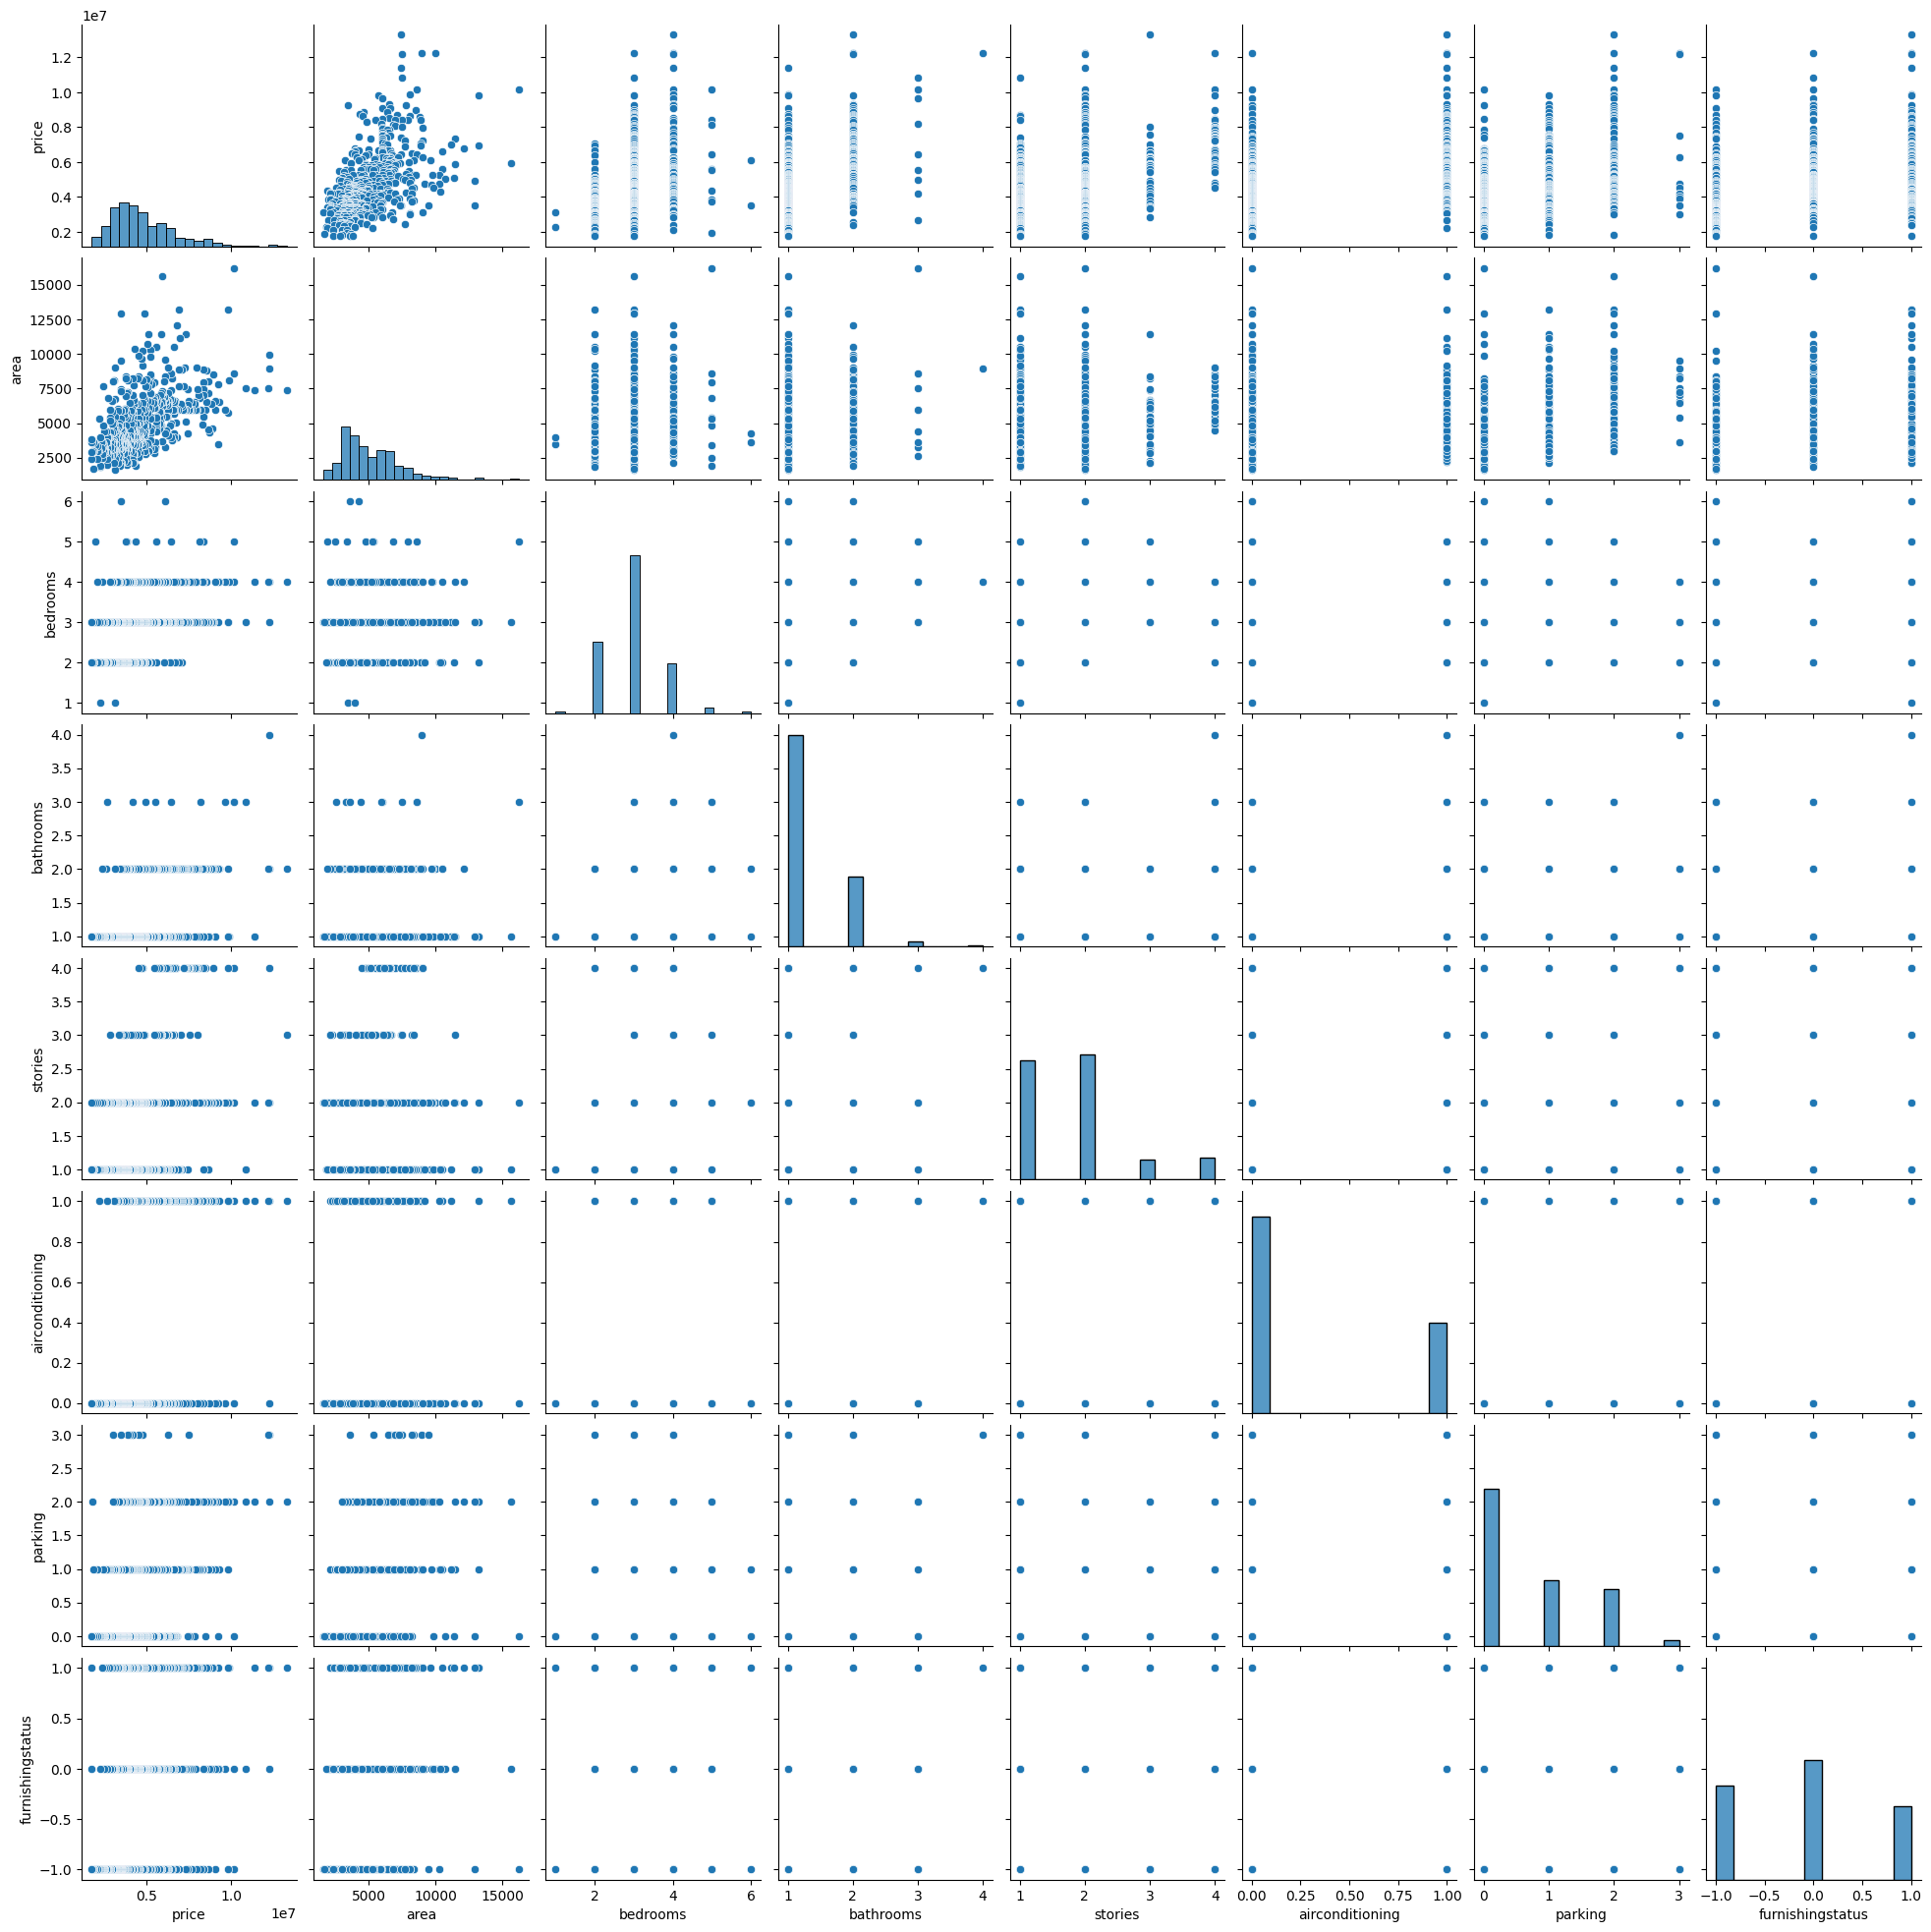

In [79]:
sns.pairplot(ds)
plt.show()

### Dimension Columns in the Dataset

In [53]:
ds.shape

(545, 13)


### Checking for Null Values in the Dataset


In [54]:
ds.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### Description of the Dataset


In [55]:
ds.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Dataset Information (`info()` method)

In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Changing the string values of the column to the respective Integer Values


### Data Cleaning and Encoding

Before building the model, it is important to convert categorical variables into numerical values for analysis. In this project, the string values in the `airconditioning` and `furnishingstatus` columns were mapped to integers:

- `airconditioning`: 'yes' → 1, 'no' → 0  
- `furnishingstatus`: 'furnished' → 1, 'semi-furnished' → 0, 'unfurnished' → -1

This encoding allows these features to be used effectively in the regression model.


In [167]:

for col in ['airconditioning', 'furnishingstatus', 'prefarea', 'mainroad', 'guestroom', 'hotwaterheating', 'basement']:
    if ds[col].dtype == 'object':
        ds[col] = ds[col].str.strip()
        if col == 'airconditioning':
            ds[col] = ds[col].map({'yes': 1, 'no': 0})
        elif col == 'furnishingstatus':
            ds[col] = ds[col].map({'furnished': 1, 'semi-furnished': 0, 'unfurnished': -1})
        elif col in ['prefarea', 'mainroad', 'guestroom', 'hotwaterheating', 'basement']:
            ds[col] = ds[col].map({'yes': 1, 'no': 0})


In [122]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


## Dependent and Independent Variables

### price = m1 * area + m2 * bedrooms + m3 * parking + m4 * bathrooms + m5 * airconditioning + m6 * furnishingstatus + m7 * mainroad + m8 * prefarea + m9 * hotwaterheating + m10 * basement + m11 * guestroom + m12 * stories	+ b 

### where price is the Dependent Variable, (m1, m2, m3, m4) are the coefficients, (area, bedrooms, parking, airconditioning, bathrooms, furnishingstatus, prefarea, mainroad, stories, guestroom, basement, hotwaterheating) are the Independent variables and b is the intercept.


## Visual exploratory data analysis

#### I visualize the relationship between price and each independent variable mentioned above

### Area vs Price

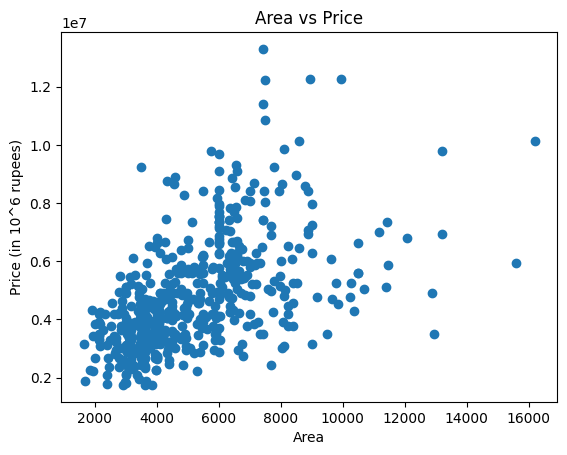

In [59]:
plt.scatter(ds['area'], ds['price'])
plt.xlabel('Area')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Area vs Price')
plt.show()

### Bedrooms vs Price

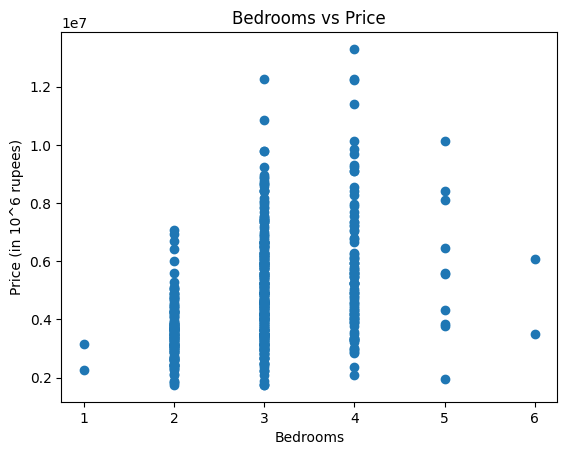

In [60]:
plt.scatter(ds['bedrooms'], ds['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Bedrooms vs Price')  
plt.show()

### Parking vs Price

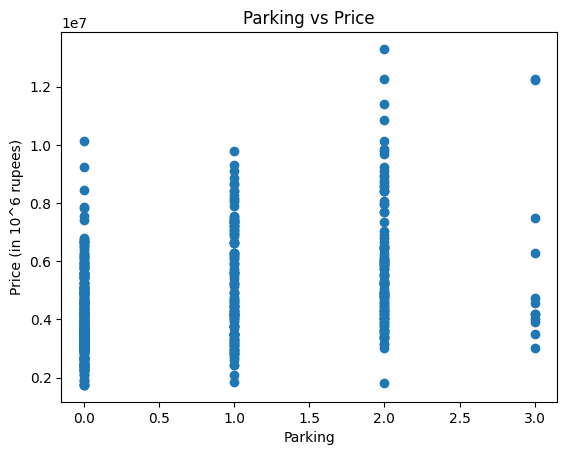

In [61]:
plt.scatter(ds['parking'], ds['price'])
plt.xlabel('Parking')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Parking vs Price')
plt.show()

### Bathrooms vs Price

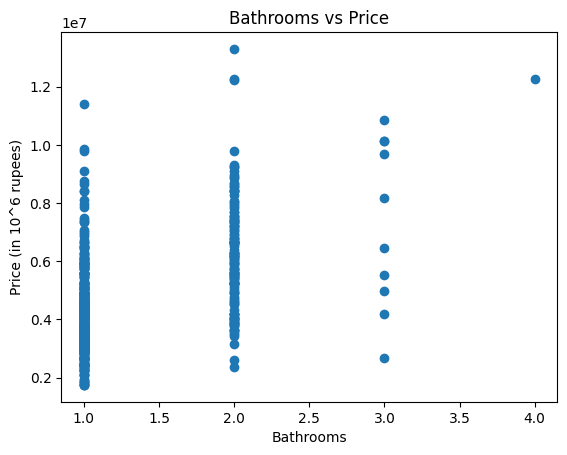

In [62]:
plt.scatter(ds['bathrooms'], ds['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Bathrooms vs Price')
plt.show()

### Air Conditioning vs Price

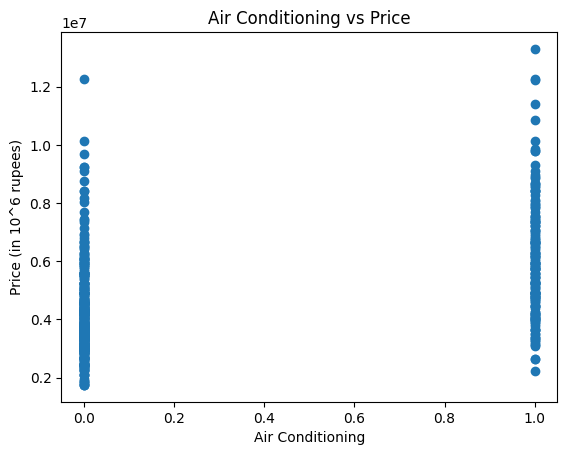

In [63]:
plt.scatter(ds['airconditioning'], ds['price'])
plt.xlabel('Air Conditioning')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Air Conditioning vs Price')
plt.show()

### Furnishing Status vs Price

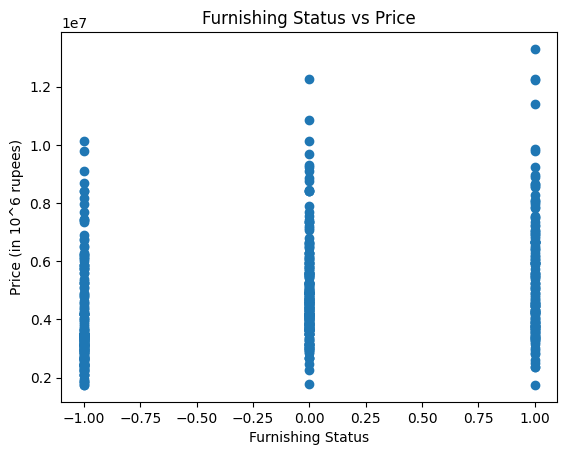

In [72]:
plt.scatter(ds['furnishingstatus'], ds['price'])
plt.xlabel('Furnishing Status')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Furnishing Status vs Price')
plt.show()

### Mainroad vs Price

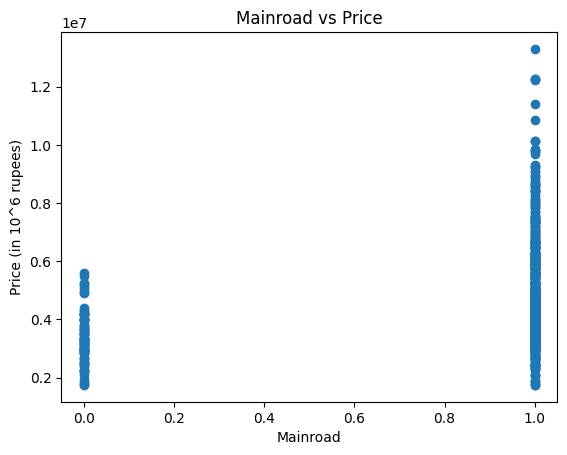

In [84]:
plt.scatter(ds['mainroad'], ds['price'])
plt.xlabel('Mainroad')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Mainroad vs Price')
plt.show()

### Preferred Area vs Price

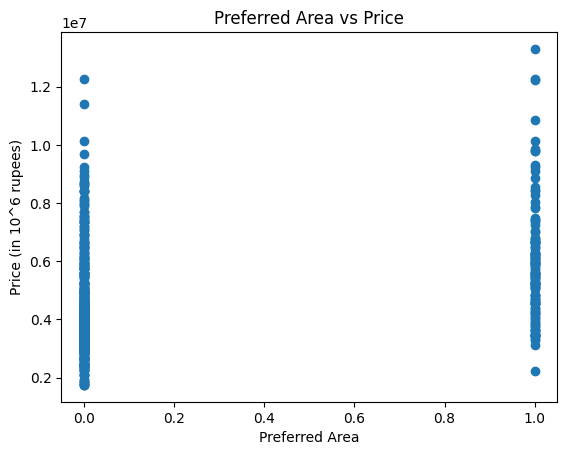

In [85]:
plt.scatter(ds['prefarea'], ds['price'])
plt.xlabel('Preferred Area')
plt.ylabel('Price (in 10^6 rupees)')
plt.title('Preferred Area vs Price')
plt.show()

## Train Test Split

🔹 Train Set
    Used to train or fit the machine learning model.

    The model learns patterns, weights, or rules from this data.

🔹 Test Set
    Used to evaluate the trained model's performance.

    It simulates unseen data to check if the model can generalize.



In [160]:
x = ds[['area', 'bedrooms', 'parking','bathrooms', 'airconditioning', 'furnishingstatus', 'prefarea', 'mainroad','hotwaterheating', 'guestroom', 'basement','stories']]
y = ds['price']



## Displaying Independent Variables

In [161]:
x

,area,bedrooms,parking,bathrooms,airconditioning,furnishingstatus,prefarea,mainroad,hotwaterheating,guestroom,basement,stories
0,7420,4,2,2,1,1,1,1,0,0,0,3
1,8960,4,3,4,1,1,0,1,0,0,0,4
2,9960,3,2,2,0,0,1,1,0,0,1,2
3,7500,4,3,2,1,1,1,1,0,0,1,2
4,7420,4,2,1,1,1,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,2,1,0,-1,0,1,0,0,1,1
541,2400,3,0,1,0,0,0,0,0,0,0,1
542,3620,2,0,1,0,-1,0,1,0,0,0,1
543,2910,3,0,1,0,1,0,0,0,0,0,1


## Displaying Dependent variables

In [162]:
y


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

## Importing necessary packages for train test

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Mechanics of the Model

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)


[5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075229 9570600.29915353 2827431.50860061
 3195686.2583409  3352263.99438471 3713879.49996131 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.70489929 3525092.18938646
 5796259.50068013 5840000.70299301 2760214.608641   4762590.14920607
 5204755.73895206 7515542.71619024 3254681.68956382 5236164.45964444
 8178523.16820284 3434166.15675649 6443921.58767581 3346004.77919184
 6742324.74004133 4154936.84088665 3589152.47491253 5788125.92515322
 4768370.18154077 4391684.04193172 3217657.04549935 4638196.61928878
 4522160.27786714 3541284.06127245 7238136.1194117  4021515.68926614
 3701978.76822757 4298879.55563098 6705004.0206061  3993466.52296897
 3798185.05328059 3451821.5624289  7293996.86867461 2832905.26972678
 4378698.1476993  4468002.85418353 3714623.89765883 2718466.90282779
 7524449.64983626 2950437.1495281 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

model.score(x_test, y_test)




0.6494754192267805

## Regression metrics for model performance

In [166]:
from sklearn.preprocessing import StandardScaler

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 1771751116594.0342
R2 Score: 0.6494754192267805


## Model slope and intercept term

In [140]:
s=model.coef_
print("Coefficients:", s)
intercept = model.intercept_
print("Intercept:", intercept)

Coefficients: [2.35848772e+02 7.85744924e+04 2.25756514e+05 1.09711727e+06
 7.85550579e+05 2.10397118e+05 6.29901661e+05 3.66824192e+05
 6.87881311e+05 2.33146766e+05 3.93159779e+05 4.06223164e+05]
Intercept: 82685.95087911282


### So, Our fitted regression line is 
y = 235.85 × area + 78,574.49 × bedrooms + 225,756.51 × parking + 1,097,117.27 × bathrooms + 785,550.58 × airconditioning + 210,397.12 × furnishingstatus + 629,901.66 × prefarea + 366,824.19 × mainroad + 687,881.31 × hotwaterheating + 233,146.77 × guestroom + 393,159.78 × basement + 406,223.16 × stories + 82,685.95

## Making predictions


### Predicting House Prices for the First 5 actual prices

Let's use the trained linear regression model to predict the house prices for the first 5 rows of the dataset (`ds`). We will compare the predicted values with the actual prices.


In [141]:
model.predict(x)[0:5]

array([ 8004072.41154001, 10563592.06998291,  7515542.71619024,
        8235633.4415223 ,  6497136.86443565])

## Reshaping X and Y

In [142]:
print(x.shape)
print(y.shape)


(545, 12)
(545,)


## Residual Analysis

##### A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

##### The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

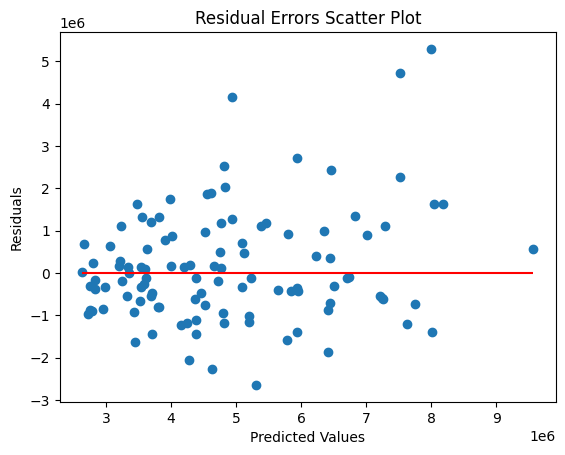

In [143]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Errors Scatter Plot')
plt.show()

## Conclusion




##### The R² score (coefficient of determination) measures how well the regression model explains the variance in the target variable (house price). A higher R² value (closer to 1) indicates that the model fits the data well and can explain a large proportion of the variance in house prices. Conversely, a lower R² value (closer to 0) suggests that the model does not capture much of the variability and may not be reliable for prediction.

##### In this project, the R² score obtained reflects the model's effectiveness in predicting house prices based on the selected features. If the R² score is reasonably high, it means the model is a good fit for the data and can be used for practical predictions. If the R² score is low, further feature engineering, data cleaning, or trying more complex models may be necessary to improve performance.

### Assumptions in Linear Regression Model

1. **Linearity**:  
    The relationship between the independent variables and the dependent variable (price) is assumed to be linear.

2. **Independence**:  
    Observations are assumed to be independent of each other.

3. **Homoscedasticity**:  
    The variance of residuals (errors) is constant across all levels of the independent variables.

4. **Normality of Errors**:  
    The residuals are assumed to be normally distributed.

5. **No Multicollinearity**:  
    The independent variables are not highly correlated with each other.

6. **No Autocorrelation**:  
    Residuals are not correlated with each other (mainly relevant for time series data).

##### These assumptions help ensure that the linear regression model provides reliable and interpretable results. Violation of these assumptions may affect the model’s performance and the validity of statistical inferences.

## References


- [GeeksforGeeks: Machine Learning](https://www.geeksforgeeks.org/machine-learning/)
- [Scikit-learn: Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [An Introduction to Statistical Learning (ISLR)](https://www.statlearning.com/)
- [Kaggle: Housing Price Prediction Datasets](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction)
- [Towards Data Science: Linear Regression for Beginners](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
- [Coursera: Machine Learning by Andrew Ng (Linear Regression)](https://www.coursera.org/learn/machine-learning)